**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

* NOMBRE: Edwin David Hernández Alejandre / MATRÍCULA: 01794692
* NOMBRE: Naomi Fabiola Tokunaga Nuñez / MATRÍCULA: A00826875
* NOMBRE: Luis Gerardo Barbosa Mendoza / MATRÍCULA: A01731203



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
# El siguiente metodo permite crear un dataframe desde una fuente de datos en la nube haciendo uso de Onedrive.
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format

import base64
def create_onedrive_directdownload (onedrive_link):
    data_bytes64 = base64.b64encode(bytes(onedrive_link, 'utf-8'))
    data_bytes64_String = data_bytes64.decode('utf-8').replace('/','_').replace('+','-').rstrip("=")
    resultUrl = f"https://api.onedrive.com/v1.0/shares/u!{data_bytes64_String}/root/content"
    return resultUrl

onedrivelink = "https://1drv.ms/u/s!AuFX6Wm4XESkgrZGkhbXOqhIBafa5w?e=gyKxxw"
onedrive_dataset = create_onedrive_directdownload (onedrivelink)


In [7]:
#Habilitar solo si se usa google colab
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
# Habilitar solo si usas un archivo local
import os
#DIR = "C:\\Git\\TecMonterrrey\\CienciaAnaliticaDatos\\actividades-edwinhdez"
#os.chdir(DIR)

In [11]:
#cars_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Actividad6/vehicles.csv') # Habilitar solo si usas google colab
cars_df  = pd.read_csv(onedrive_dataset) # Habilitar solo si usas onedrive
#cars_df = pd.read_csv('vehicles.csv') # Habilitar solo si usas un archivo local
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.000000,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.000000,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.000000,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.000000,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [12]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`.


In [13]:
# Eliminar columnas que no seran relevantes del dataframe: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`.
cars_df = cars_df.drop(columns=['id', 'VIN', 'url', 'image_url', 'description', 'posting_date'])

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [14]:
# Almacena en un varible la cantidad de registros del dataframe.
total_records = len(cars_df)
print("Total de registros: ", total_records)
# Almacena el numero de columnas
total_columns = len(cars_df.columns)
print("Total de columnas: ", total_columns)



Total de registros:  426880
Total de columnas:  20


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [15]:
# Calcula el porcentaje de valores faltantes por columna.
missing_values = cars_df.isnull().sum() / total_records * 100
missing_values

region           0.000000
region_url       0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
county         100.000000
state            0.000000
lat              1.534155
long             1.534155
dtype: float64

In [16]:
# Elimina las columnas que posean el 30% o mas de valores faltantes implementando thresh de la funcion dropna.
cars_df = cars_df.dropna(thresh=total_records*0.7, axis=1)
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  type          334022 non-null  object 
 11  state         426880 non-null  object 
 12  lat           420331 non-null  float64
 13  long          420331 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 45.6+ MB


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [17]:
# Calcular el porcentaje de valores faltantes en cada columna
columns = cars_df.columns
total_records
umbral = 0.05  # 5%

# Crear una lista de columnas que cumplen con el umbral
columns_filter = []
for column in columns:
    valores_faltantes = cars_df[column].isna().sum()
    porcentaje_faltante = valores_faltantes / total_records
    if porcentaje_faltante < umbral:
        columns_filter.append(column)
        print(f"La columna {column} tiene {porcentaje_faltante*100}% de valores faltantes")

# Eliminar filas con valores faltantes en las columnas seleccionadas usando 'subset'
cars_df = cars_df.dropna(subset=columns_filter, axis=0)

# El DataFrame df ahora contiene solo las filas sin valores faltantes en las columnas con menos del 5% de valores faltantes
cars_df.info()

La columna region tiene 0.0% de valores faltantes
La columna region_url tiene 0.0% de valores faltantes
La columna price tiene 0.0% de valores faltantes
La columna year tiene 0.28228073463268366% de valores faltantes
La columna manufacturer tiene 4.133714392803598% de valores faltantes
La columna model tiene 1.2361787856071964% de valores faltantes
La columna fuel tiene 0.7058189655172414% de valores faltantes
La columna odometer tiene 1.0307346326836582% de valores faltantes
La columna title_status tiene 1.9307533733133435% de valores faltantes
La columna transmission tiene 0.5987631184407797% de valores faltantes
La columna state tiene 0.0% de valores faltantes
La columna lat tiene 1.5341547976011993% de valores faltantes
La columna long tiene 1.5341547976011993% de valores faltantes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 383489 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0 

2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [18]:
# Just in case to prevent rerunning the entire notebook
cars_df_backup = cars_df.copy()

In [19]:
# Restoring dataframe
#cars_df = cars_df_backup
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383489 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        383489 non-null  object 
 1   region_url    383489 non-null  object 
 2   price         383489 non-null  int64  
 3   year          383489 non-null  float64
 4   manufacturer  383489 non-null  object 
 5   model         383489 non-null  object 
 6   fuel          383489 non-null  object 
 7   odometer      383489 non-null  float64
 8   title_status  383489 non-null  object 
 9   transmission  383489 non-null  object 
 10  type          301094 non-null  object 
 11  state         383489 non-null  object 
 12  lat           383489 non-null  float64
 13  long          383489 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 43.9+ MB


In [20]:
# Calcula el % de valores faltantes en cada columna
missing_values = cars_df.isnull().sum() / total_records * 100
missing_values

region          0.000000
region_url      0.000000
price           0.000000
year            0.000000
manufacturer    0.000000
model           0.000000
fuel            0.000000
odometer        0.000000
title_status    0.000000
transmission    0.000000
type           19.301677
state           0.000000
lat             0.000000
long            0.000000
dtype: float64

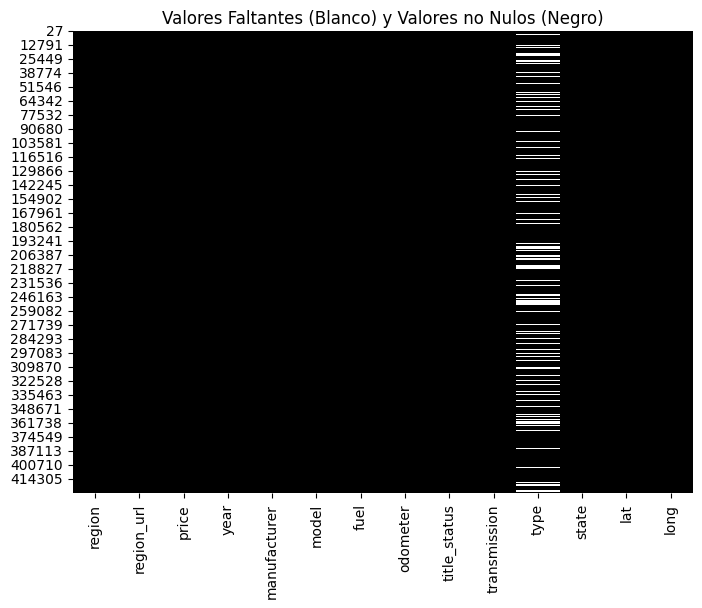

In [21]:
# Generar un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cars_df.isnull(), cmap=["black", "white"], cbar=False)
plt.title("Valores Faltantes (Blanco) y Valores no Nulos (Negro)")
plt.show()

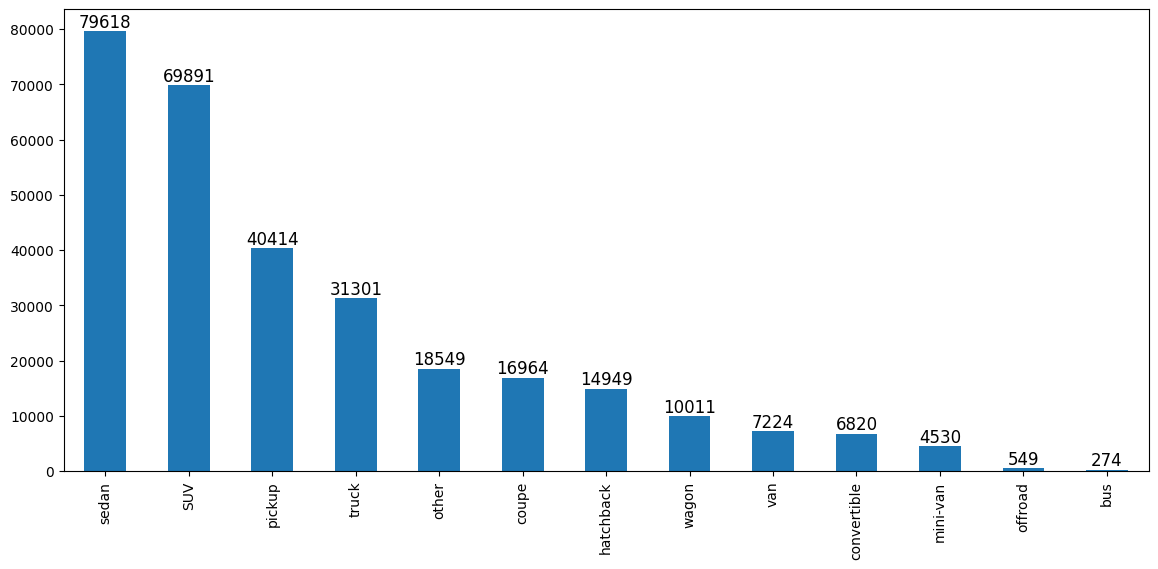

In [22]:
# Histograma de la columna type
cars_df['type'].value_counts().plot(kind='bar', figsize=(14,6))
# Agrega el total de cada columna en el grafico
for index, value in enumerate(cars_df['type'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)


In [23]:
# Imputar los valores faltantes de la columna type con el valor mas frecuente, estoy usando el metodo fillna de pandas con la moda.
cars_df['type'].fillna(cars_df['type'].mode()[0], inplace=True)

In [24]:

# Calcula el % de valores faltantes en cada columna
missing_values = cars_df.isnull().sum() / total_records * 100
missing_values

region         0.000000
region_url     0.000000
price          0.000000
year           0.000000
manufacturer   0.000000
model          0.000000
fuel           0.000000
odometer       0.000000
title_status   0.000000
transmission   0.000000
type           0.000000
state          0.000000
lat            0.000000
long           0.000000
dtype: float64

No existen valores nulos

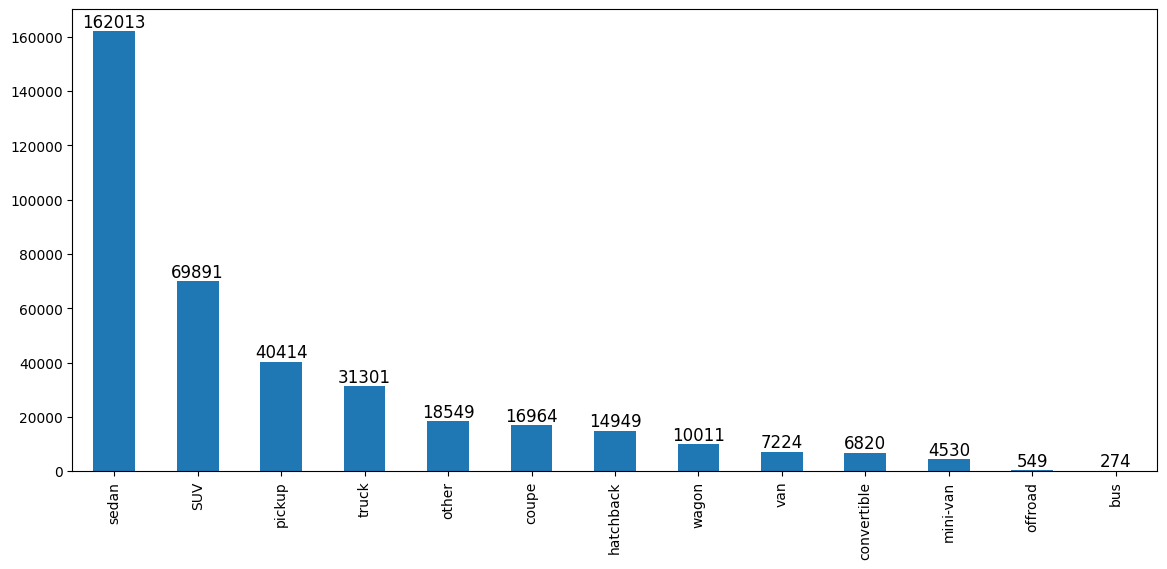

In [25]:
# Histograma de la columna type
cars_df['type'].value_counts().plot(kind='bar', figsize=(14,6))
# Agrega el total de cada columna en el grafico
for index, value in enumerate(cars_df['type'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

Al ser una variable categorica, se obto por usar la moda, sin embargo; observo que la categoria __Sedan__ incremento su frecuencia, en este caso esta variable se puede considerar como dominante; Esto puede ser un desafío en Machine Learning, ya que el modelo puede sesgarse hacia la clase dominante y tener dificultades para reconocer las clases minoritarias.

## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

In [26]:
# Just in case to prevent rerunning the entire notebook
cars_df_backup2 = cars_df.copy()

In [27]:
# Restoring dataframe
#cars_df = cars_df_backup2
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383489 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        383489 non-null  object 
 1   region_url    383489 non-null  object 
 2   price         383489 non-null  int64  
 3   year          383489 non-null  float64
 4   manufacturer  383489 non-null  object 
 5   model         383489 non-null  object 
 6   fuel          383489 non-null  object 
 7   odometer      383489 non-null  float64
 8   title_status  383489 non-null  object 
 9   transmission  383489 non-null  object 
 10  type          383489 non-null  object 
 11  state         383489 non-null  object 
 12  lat           383489 non-null  float64
 13  long          383489 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 43.9+ MB


<Axes: >

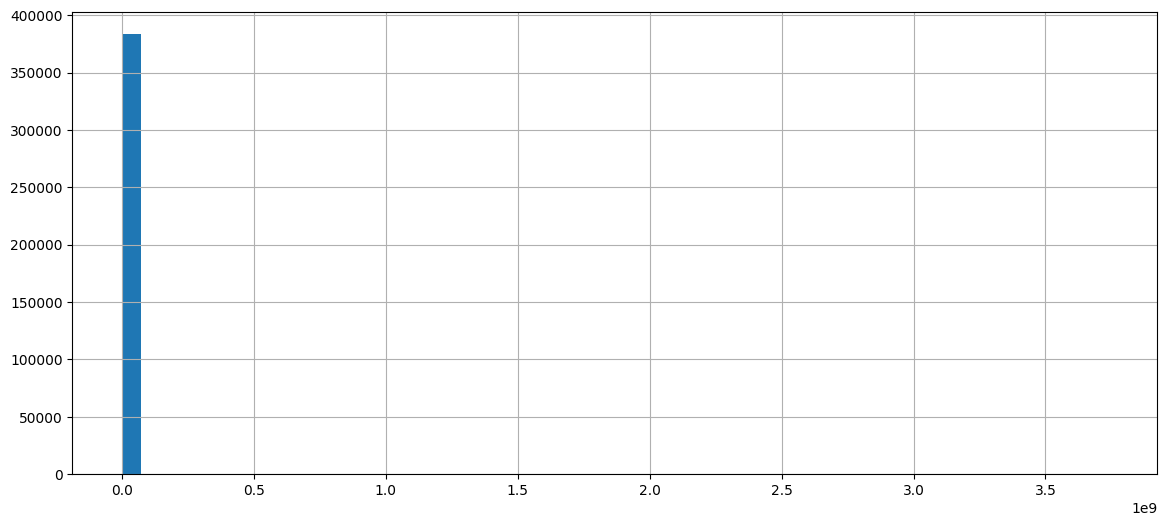

In [28]:
# Genera un histograma de la columna price con un bins de 20
cars_df['price'].hist(bins=50, figsize=(14,6))

<Axes: ylabel='Frequency'>

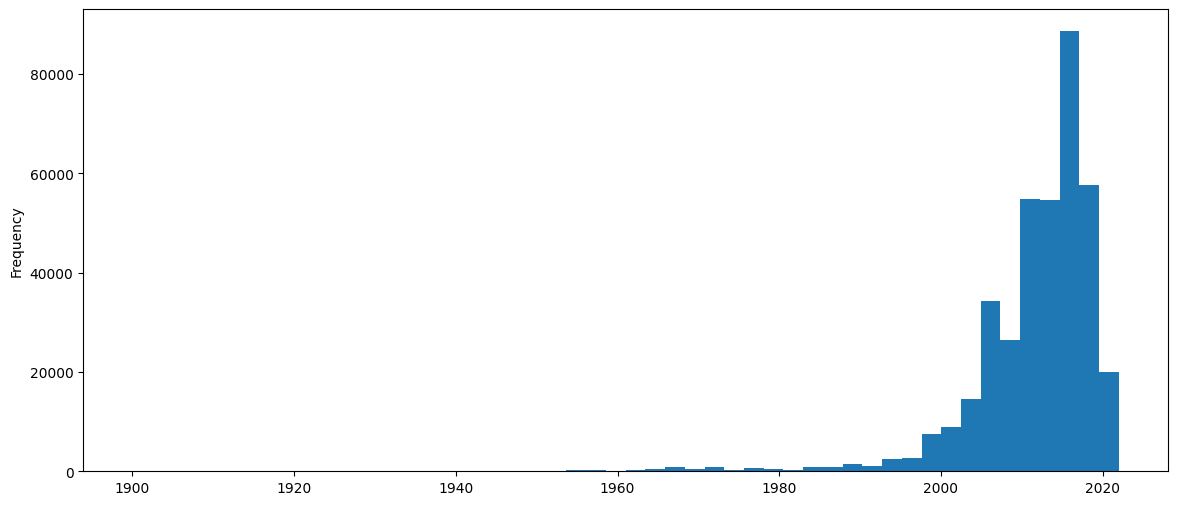

In [29]:
# Genera un histograma de la columna year
cars_df['year'].plot(kind='hist', bins = 50 ,figsize=(14,6))

<Axes: ylabel='Frequency'>

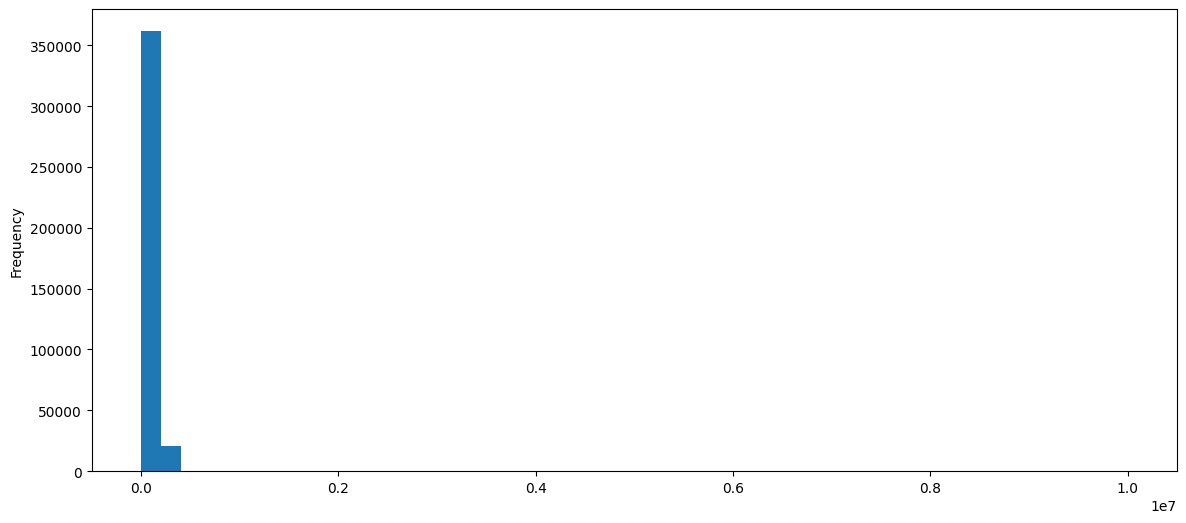

In [30]:
# Genera un histograma de la columna year
cars_df['odometer'].plot(kind='hist', bins = 50 ,figsize=(14,6))

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [31]:
from datetime import datetime
# Calcular la columna age a partir de la columna year
cars_df['age'] = datetime.now().year - cars_df['year']

# Eliminar la columna year del dataframe
cars_df = cars_df.drop(columns=['year'])

<Axes: xlabel='age', ylabel='Count'>

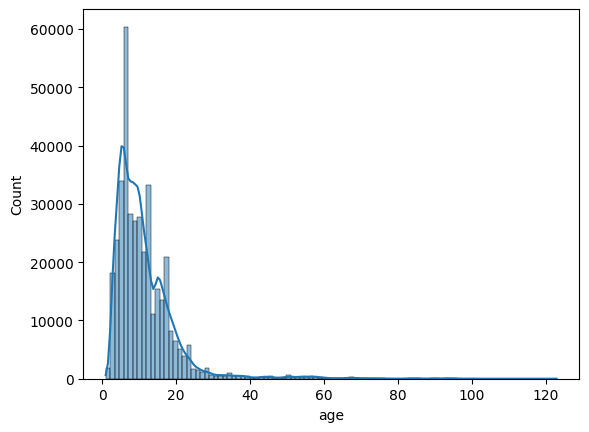

In [32]:
# Genera un histograma de la columna age
# Agregar la curva de densidad KDE a la columna age
sns.histplot(cars_df["age"], bins=100, kde = True)

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

In [33]:
def add_median_labels(ax):
    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1]-median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:.1f}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        #text.set_path_effects([
        #    path_effects.Stroke(linewidth=3, foreground=median.get_color()),
        #    path_effects.Normal(),
        #])

def CreateBoxPlot(df, feature, color):
    boxplot = sns.set_style("darkgrid")
    boxplot = sns.boxplot( x=df, width=0.8)
    boxplot = sns.stripplot(x=df, marker="o", alpha=0.011, color=color)
    boxplot.axes.set_title(" ", fontsize=16)
    boxplot.set_xlabel(" ", fontsize=14)
    boxplot.set_ylabel(feature, fontsize=14)
    boxplot.axvline(df.mean(), color = "orange", linestyle = '--', label= "mean")
    #boxplot.axvline(offset+buffer, color = "red", linestyle = '--', label= strBuffer)

    labels = ["mean"]
    handles, _ = boxplot.axes.get_legend_handles_labels()
    print(handles[1:])

    # Slice list to remove first handle
    plt.legend(handles = handles[0:2], labels = labels)

    add_median_labels(boxplot.axes)
    plt.show()

[]


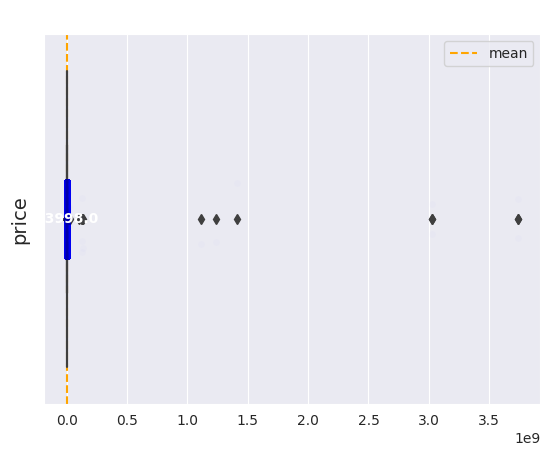

[]


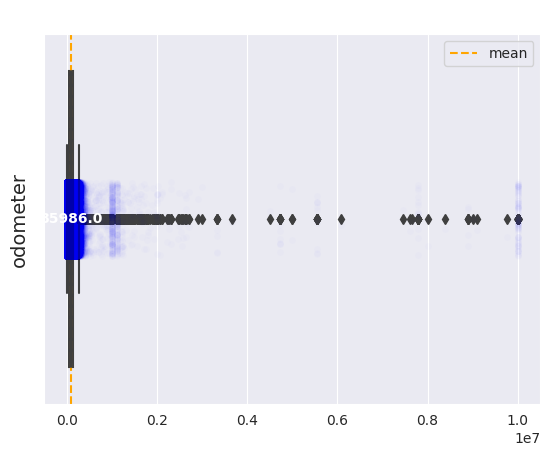

[]


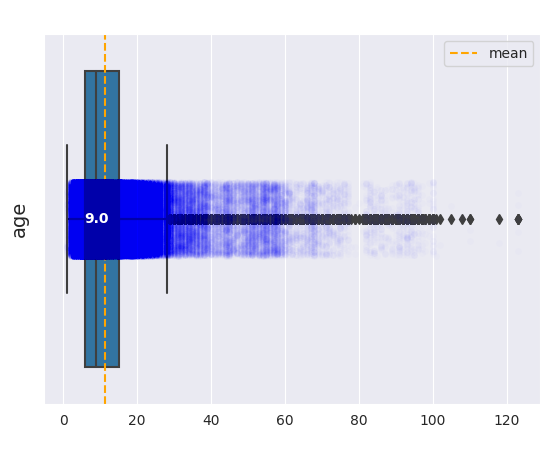

In [34]:
# Se llama la función que genera el boxplot. La particularidad de esta función es que sobrepone
# los datos en el boxplot y así tener una mejor comprensión del tamaño de cada quartil.
# Agrega en números en color blanco el valor de la mediana, y una linea vertical amarilla como referencia de la media.
# Cada punto de datos esta ubicado en el box plot en relación a su valor.
columns = ["price", "odometer", "age"]
for columna in columns:
    CreateBoxPlot(cars_df[columna], columna, "blue")

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [35]:
def calculate_outliers(column_name, df):
    # Obtiene el numero de registros de la variable
    total_records = len(df[column_name])
    print("Total de registros de la variable", column_name, ":", total_records)

    # Obtiene el valor del percentil 25 de la variable
    q1 = df[column_name].quantile(0.25)
    print("Percentil 25 de la variable", column_name, ":", q1)

    # Obtiene el valor del percentil 50 de la variable
    q2 = df[column_name].quantile(0.50)
    print("Percentil 50 de la variable", column_name, ":", q2)

    # Obtiene el valor del percentil 75 de la variable
    q3 = df[column_name].quantile(0.75)
    print("Percentil 75 de la variable", column_name, ":", q3)

    # Obtiene el valor intercuartil de la variable
    iqr = q3 - q1
    print("IQR de la variable", column_name, ":", iqr)

    # Obtiene el valor whisker inferior de la variable
    whisker_inferior = q1 - 1.5 * iqr
    print("Whisker inferior de la variable", column_name, ":", whisker_inferior)

    # Obtiene el valor whisker superior de la variable
    whisker_superior = q3 + 1.5 * iqr
    print("Whisker superior de la variable", column_name, ":", whisker_superior)

    # Determinar cuantos valores de la columna estan por encima del valor whisker superior en porcentaje del total de registros
    outliers_superior_percentage = df[df[column_name] > whisker_superior][column_name].count() / total_records * 100
    print(f"El % de valores atipicos superior de la columna {column_name} es: {outliers_superior_percentage}%")

    # Determinar cuantos valores de la columna estan por debajo del valor whisker inferior en porcentaje del total de registros
    outliers_inferior_percentage = df[df[column_name] < whisker_inferior][column_name].count() / total_records * 100
    print(f"El % de valores atipicos inferior de la columna {column_name} es: {outliers_inferior_percentage}%")

    # Determina la suma total de porcentaje de outliers superior e inferior
    outliers_total_percentage = outliers_superior_percentage + outliers_inferior_percentage
    print(f"El % de valores atipicos total de la columna que se eliminará de {column_name} es: {outliers_total_percentage}%")

    # Devuelve los valores de outliers_superior y outliers_inferior
    return whisker_inferior, whisker_superior, outliers_total_percentage

In [36]:
# Obtenemos el % de valores atipicos de la columna price y obtenemos los valores whisker superior e inferior
whisker_inferior_price, whisker_superior_price, total_percentage_outliers_price = calculate_outliers("price", cars_df)

Total de registros de la variable price : 383489
Percentil 25 de la variable price : 5999.0
Percentil 50 de la variable price : 13998.0
Percentil 75 de la variable price : 26888.0
IQR de la variable price : 20889.0
Whisker inferior de la variable price : -25334.5
Whisker superior de la variable price : 58221.5
El % de valores atipicos superior de la columna price es: 1.6388996816075556%
El % de valores atipicos inferior de la columna price es: 0.0%
El % de valores atipicos total de la columna que se eliminará de price es: 1.6388996816075556%


In [37]:
# Eliminar del dataframe todos los registros que esten por encima del valor whisker superior de la columna price
cars_df = cars_df[(cars_df["price"] < whisker_superior_price) & (cars_df["price"] > whisker_inferior_price)]

In [38]:
# Obtenemos el % de valores atipicos de la columna odometer y obtenemos los valores whisker superior e inferior
whisker_inferior_odometer, whisker_superior_odometer, total_percentage_outliers_odometer = calculate_outliers("odometer", cars_df)

Total de registros de la variable odometer : 377204
Percentil 25 de la variable odometer : 39250.75
Percentil 50 de la variable odometer : 87430.0
Percentil 75 de la variable odometer : 134964.0
IQR de la variable odometer : 95713.25
Whisker inferior de la variable odometer : -104319.125
Whisker superior de la variable odometer : 278533.875
El % de valores atipicos superior de la columna odometer es: 0.8175947232797107%
El % de valores atipicos inferior de la columna odometer es: 0.0%
El % de valores atipicos total de la columna que se eliminará de odometer es: 0.8175947232797107%


In [39]:
# Eliminar del dataframe todos los registros que esten por encima del valor whisker superior de la columna odometer
cars_df = cars_df[(cars_df["odometer"] < whisker_superior_odometer) & (cars_df["odometer"] > whisker_inferior_odometer)]

In [40]:
# Obtenemos el % de valores atipicos de la columna age y obtenemos los valores whisker superior e inferior
whisker_inferior_age, whisker_superior_age, total_percentage_outliers_age = calculate_outliers("age", cars_df)

Total de registros de la variable age : 374120
Percentil 25 de la variable age : 6.0
Percentil 50 de la variable age : 9.0
Percentil 75 de la variable age : 15.0
IQR de la variable age : 9.0
Whisker inferior de la variable age : -7.5
Whisker superior de la variable age : 28.5
El % de valores atipicos superior de la columna age es: 3.0319148936170213%
El % de valores atipicos inferior de la columna age es: 0.0%
El % de valores atipicos total de la columna que se eliminará de age es: 3.0319148936170213%


In [41]:
# Eliminar del dataframe todos los registros que esten por encima del valor whisker superior de la columna age
cars_df = cars_df[(cars_df["age"] < whisker_superior_age) & (cars_df["age"] > whisker_inferior_age)]

In [42]:
# Calcula el total de registros eliminados
total_records_deleted = total_percentage_outliers_price + total_percentage_outliers_odometer + total_percentage_outliers_age
print(f"El % de valores atipicos que se eliminaron es: {total_records_deleted}%")

El % de valores atipicos que se eliminaron es: 5.488409298504287%


In [43]:
# Se confirma el numero de registros eliminados revisando el total de registros en el dataset
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362777 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        362777 non-null  object 
 1   region_url    362777 non-null  object 
 2   price         362777 non-null  int64  
 3   manufacturer  362777 non-null  object 
 4   model         362777 non-null  object 
 5   fuel          362777 non-null  object 
 6   odometer      362777 non-null  float64
 7   title_status  362777 non-null  object 
 8   transmission  362777 non-null  object 
 9   type          362777 non-null  object 
 10  state         362777 non-null  object 
 11  lat           362777 non-null  float64
 12  long          362777 non-null  float64
 13  age           362777 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 41.5+ MB


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

[]


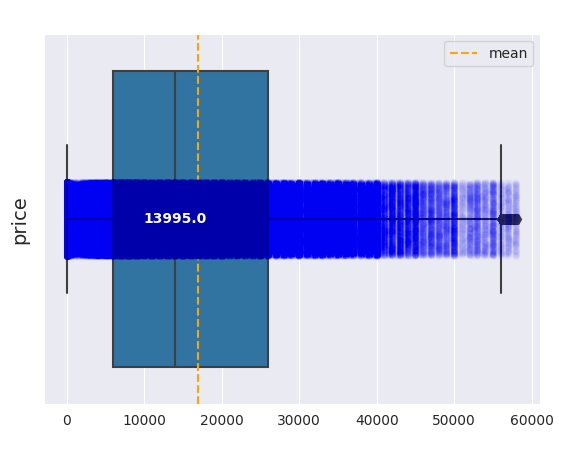

In [44]:
# Boxplot de la columna price
CreateBoxPlot(cars_df["price"], "price", "blue")


[]


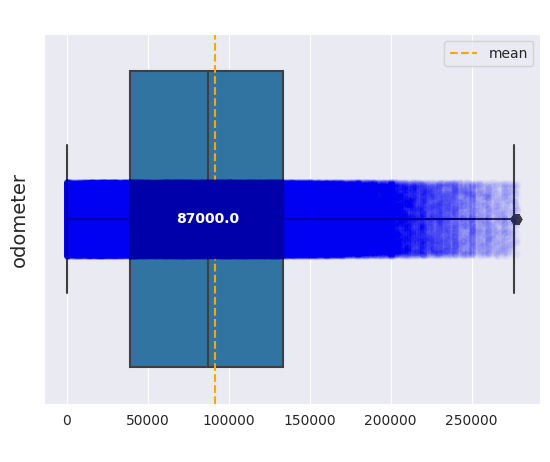

In [45]:
# Boxplot de la columna price
CreateBoxPlot(cars_df["odometer"], "odometer", "blue")

[]


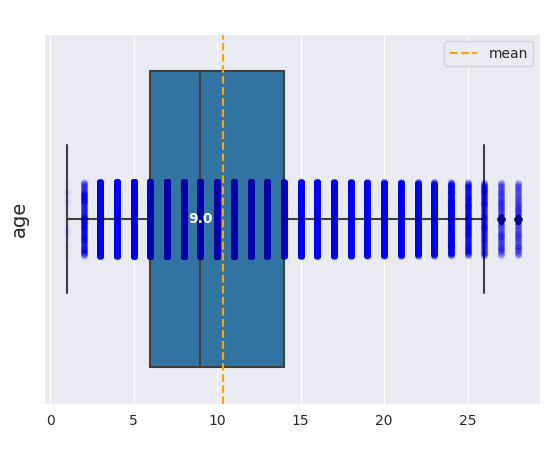

In [46]:
# Boxplot de la columna price
CreateBoxPlot(cars_df["age"], "age", "blue")

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


In [47]:
# Just in case to prevent rerunning the entire notebook
cars_df_backup3 = cars_df.copy()

In [48]:
# Restoring dataframe
#cars_df = cars_df_backup3
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362777 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        362777 non-null  object 
 1   region_url    362777 non-null  object 
 2   price         362777 non-null  int64  
 3   manufacturer  362777 non-null  object 
 4   model         362777 non-null  object 
 5   fuel          362777 non-null  object 
 6   odometer      362777 non-null  float64
 7   title_status  362777 non-null  object 
 8   transmission  362777 non-null  object 
 9   type          362777 non-null  object 
 10  state         362777 non-null  object 
 11  lat           362777 non-null  float64
 12  long          362777 non-null  float64
 13  age           362777 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 41.5+ MB


In [49]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=100, kde = True)
    #df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")
    plt.show()

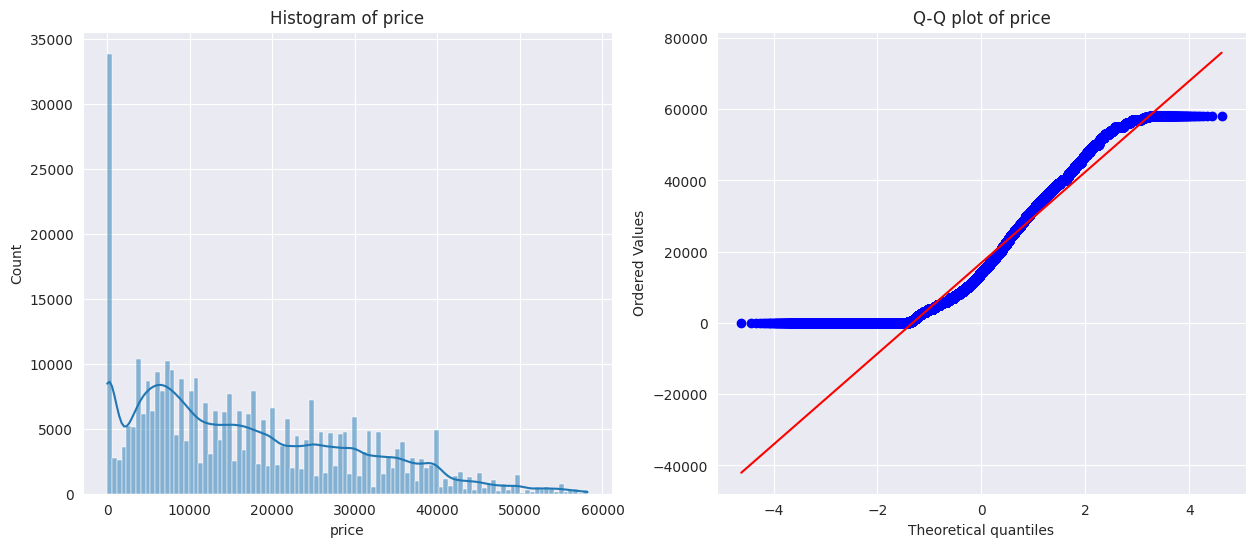

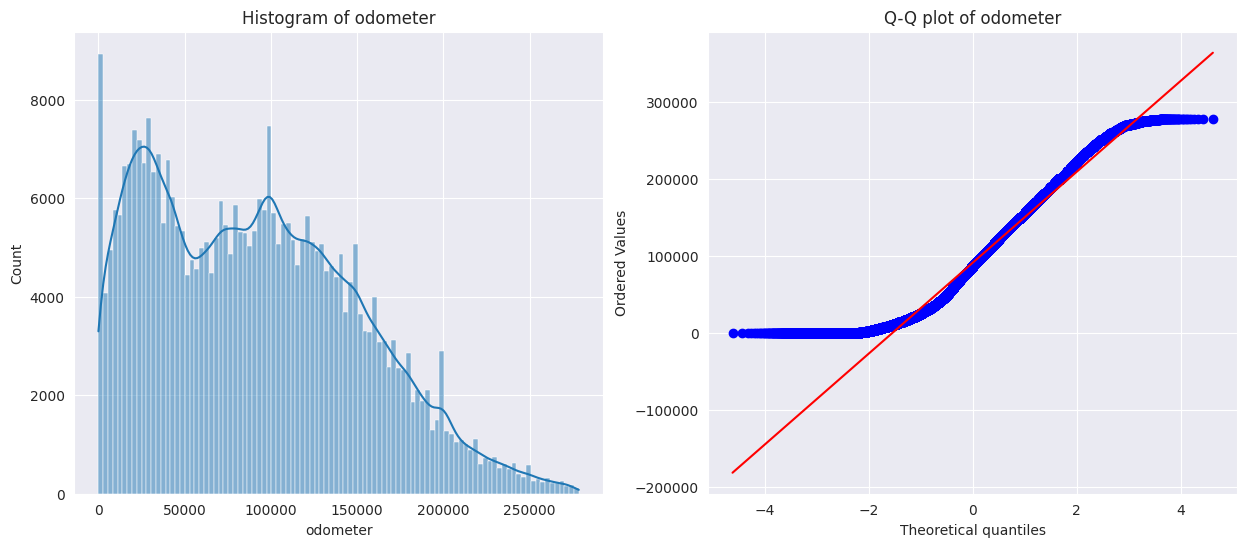

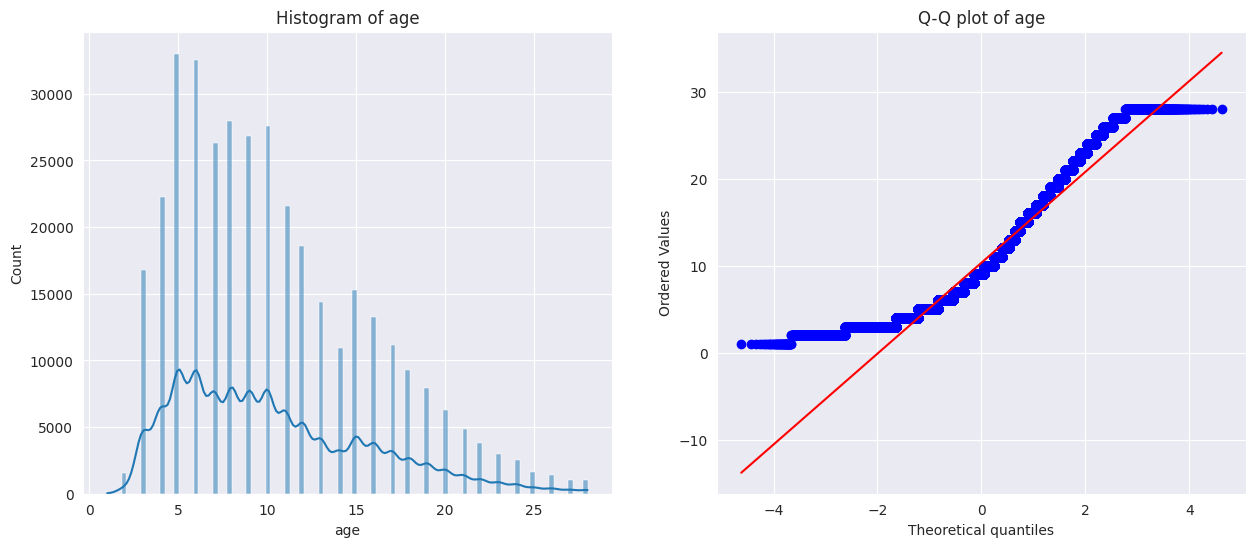

In [50]:
# llamar la funcion diagnostic_plots para la columnas price, odometer y age
diagnostic_plots(cars_df, "price")
diagnostic_plots(cars_df, "odometer")
diagnostic_plots(cars_df, "age")

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [51]:
# crea copia del dataframe
trans_df = cars_df.copy()

from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Seleccionar las columnas a transformar
cols_to_transform = ['price', 'odometer', 'age']

# Crear el transformador Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')

# Aplicar la transformación a las columnas seleccionadas
trans_df[cols_to_transform] = pt.fit_transform(trans_df[cols_to_transform])

# Mostrar el dataframe transformado
print(trans_df)




         region                      region_url    price manufacturer  \
27       auburn   https://auburn.craigslist.org 1.114614          gmc   
28       auburn   https://auburn.craigslist.org 0.596495    chevrolet   
29       auburn   https://auburn.craigslist.org 1.356428    chevrolet   
30       auburn   https://auburn.craigslist.org 1.002153       toyota   
31       auburn   https://auburn.craigslist.org 0.146535         ford   
...         ...                             ...      ...          ...   
426875  wyoming  https://wyoming.craigslist.org 0.648877       nissan   
426876  wyoming  https://wyoming.craigslist.org 0.984379        volvo   
426877  wyoming  https://wyoming.craigslist.org 1.173115     cadillac   
426878  wyoming  https://wyoming.craigslist.org 0.911920        lexus   
426879  wyoming  https://wyoming.craigslist.org 0.984379          bmw   

                           model    fuel  odometer title_status transmission  \
27      sierra 1500 crew cab slt     gas -0

In [52]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362777 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        362777 non-null  object 
 1   region_url    362777 non-null  object 
 2   price         362777 non-null  int64  
 3   manufacturer  362777 non-null  object 
 4   model         362777 non-null  object 
 5   fuel          362777 non-null  object 
 6   odometer      362777 non-null  float64
 7   title_status  362777 non-null  object 
 8   transmission  362777 non-null  object 
 9   type          362777 non-null  object 
 10  state         362777 non-null  object 
 11  lat           362777 non-null  float64
 12  long          362777 non-null  float64
 13  age           362777 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 41.5+ MB


In [53]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362777 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        362777 non-null  object 
 1   region_url    362777 non-null  object 
 2   price         362777 non-null  float64
 3   manufacturer  362777 non-null  object 
 4   model         362777 non-null  object 
 5   fuel          362777 non-null  object 
 6   odometer      362777 non-null  float64
 7   title_status  362777 non-null  object 
 8   transmission  362777 non-null  object 
 9   type          362777 non-null  object 
 10  state         362777 non-null  object 
 11  lat           362777 non-null  float64
 12  long          362777 non-null  float64
 13  age           362777 non-null  float64
dtypes: float64(5), object(9)
memory usage: 41.5+ MB


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

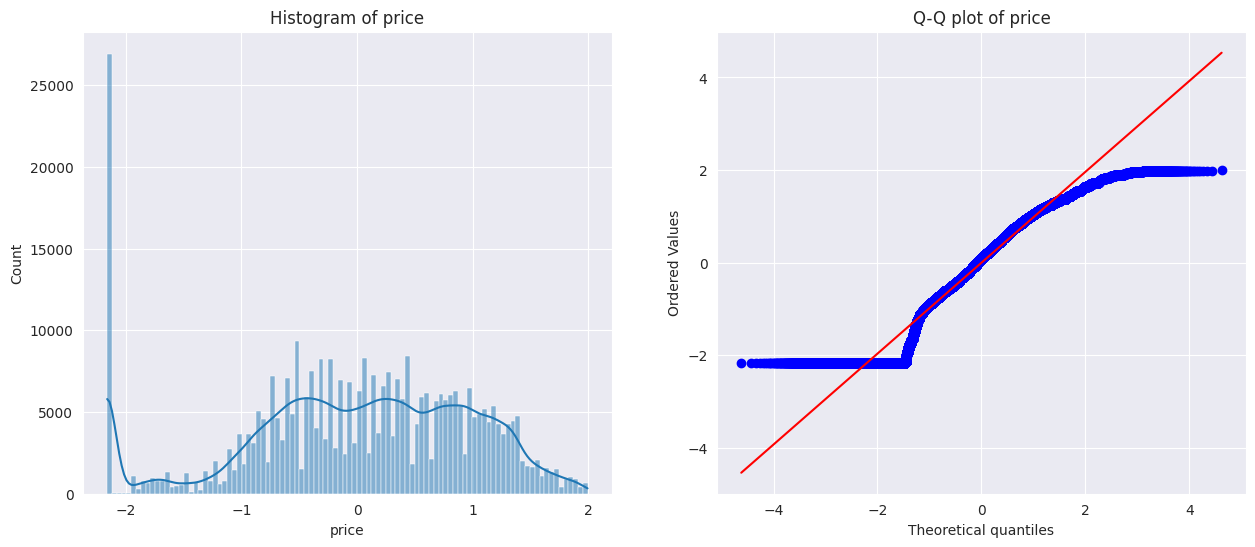

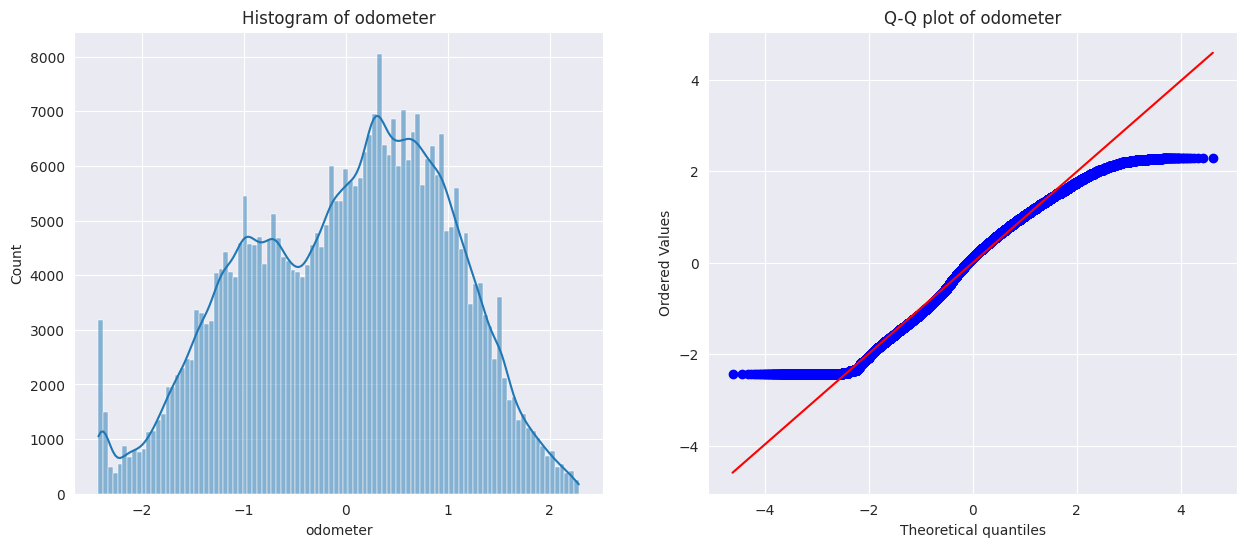

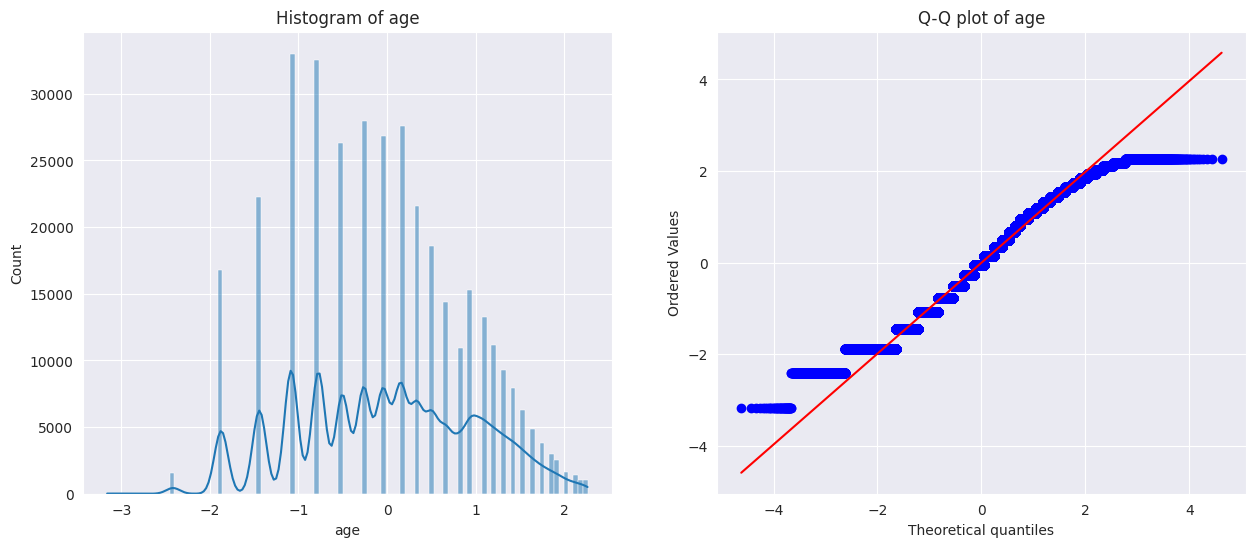

In [54]:
# llamar la funcion diagnostic_plots para la columnas price, odometer y age
diagnostic_plots(trans_df, "price")
diagnostic_plots(trans_df, "odometer")
diagnostic_plots(trans_df, "age")

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


In [55]:
# Just in case to prevent rerunning the entire notebook
trans_df_backup4 = trans_df.copy()

In [56]:
# Restoring dataframe
#trans_df = cars_df_backup4
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362777 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        362777 non-null  object 
 1   region_url    362777 non-null  object 
 2   price         362777 non-null  float64
 3   manufacturer  362777 non-null  object 
 4   model         362777 non-null  object 
 5   fuel          362777 non-null  object 
 6   odometer      362777 non-null  float64
 7   title_status  362777 non-null  object 
 8   transmission  362777 non-null  object 
 9   type          362777 non-null  object 
 10  state         362777 non-null  object 
 11  lat           362777 non-null  float64
 12  long          362777 non-null  float64
 13  age           362777 non-null  float64
dtypes: float64(5), object(9)
memory usage: 41.5+ MB


In [57]:
# copia de trans_df en minmax_df
minmax_df = trans_df.copy()

# aplica el método Min-Max para que queden en el rango fijo [0 a 1].
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas a transformar
cols_to_transform = ['price', 'odometer', 'age']

# Crear el transformador MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la escala a las columnas seleccionadas
minmax_df[cols_to_transform] = scaler.fit_transform(trans_df[cols_to_transform])

# Mostrar el dataframe escalado
print(minmax_df[cols_to_transform])
minmax_df.info()

          price  odometer      age
27     0.788279  0.434239 0.573885
28     0.663623  0.484697 0.704320
29     0.846457  0.240991 0.237377
30     0.761222  0.361921 0.439710
31     0.555366  0.661793 0.610447
...         ...       ...      ...
426875 0.676226  0.317882 0.316881
426876 0.756945  0.188010 0.237377
426877 0.802354  0.106726 0.237377
426878 0.739512  0.306606 0.382992
426879 0.756945  0.263874 0.316881

[362777 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 362777 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        362777 non-null  object 
 1   region_url    362777 non-null  object 
 2   price         362777 non-null  float64
 3   manufacturer  362777 non-null  object 
 4   model         362777 non-null  object 
 5   fuel          362777 non-null  object 
 6   odometer      362777 non-null  float64
 7   title_status  362777 non-null  object 
 

6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

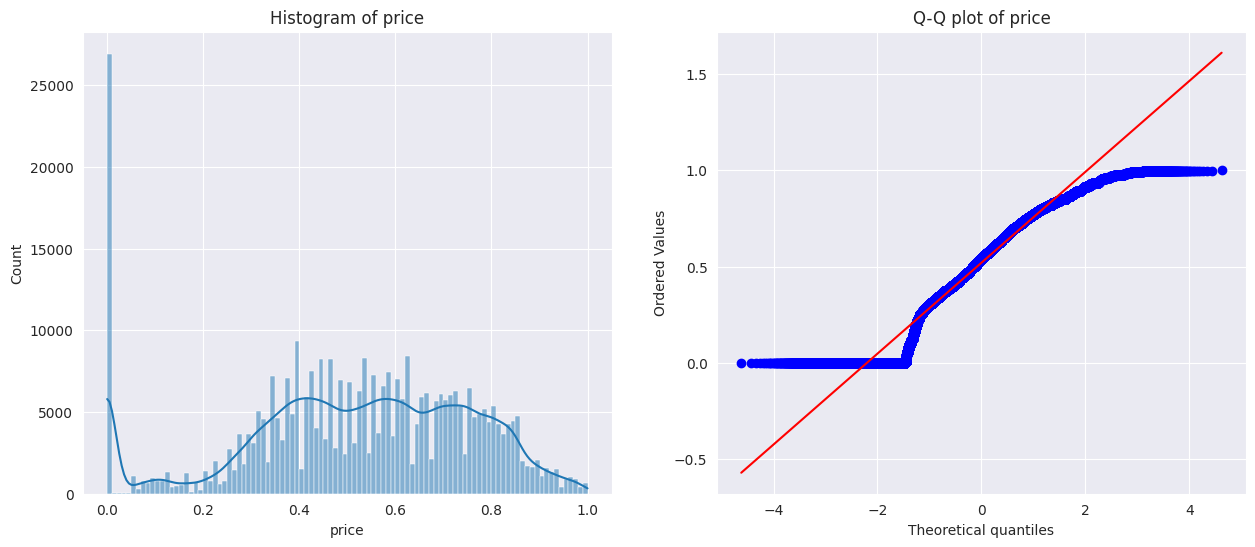

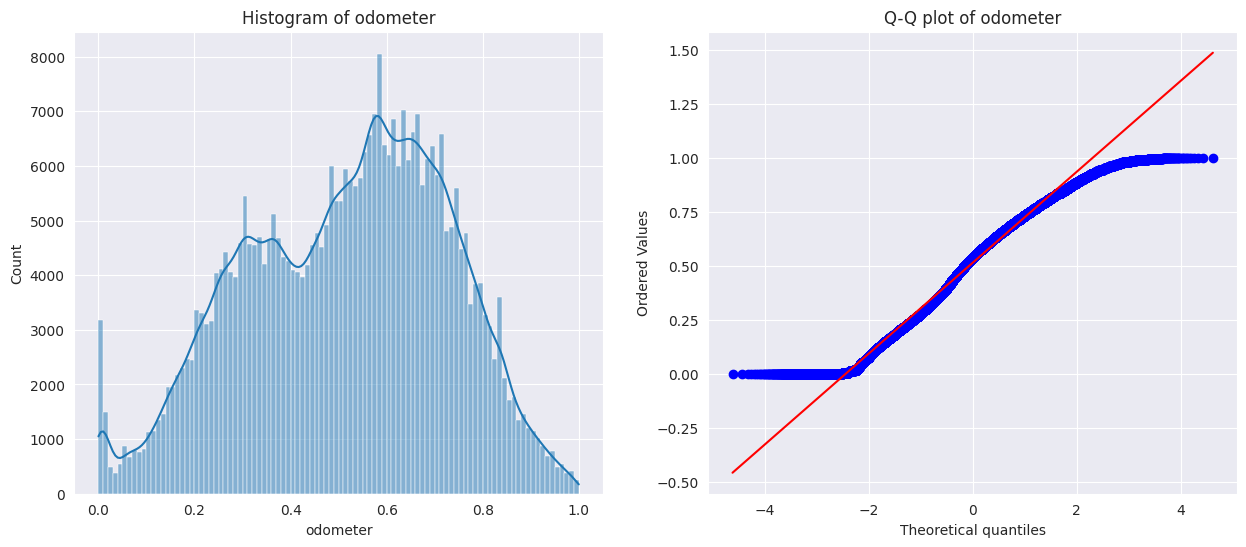

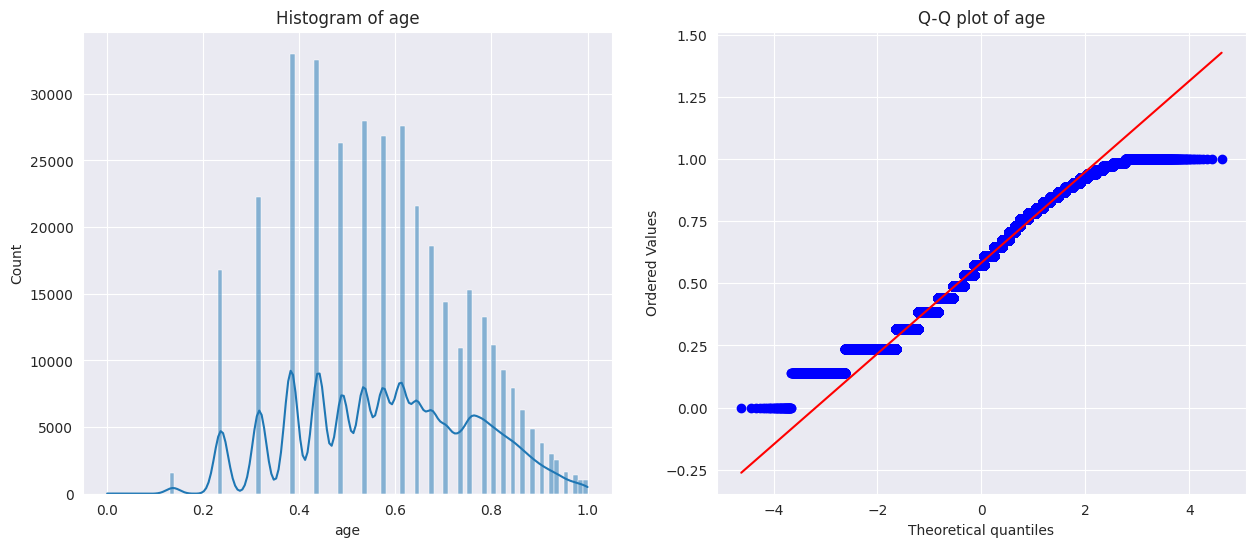

In [58]:
# llamar la funcion diagnostic_plots para la columnas price, odometer y age
diagnostic_plots(minmax_df, "price")
diagnostic_plots(minmax_df, "odometer")
diagnostic_plots(minmax_df, "age")

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [59]:
# Just in case to prevent rerunning the entire notebook
trans_df_backup5= minmax_df.copy()

In [60]:
# Restoring dataframe
#minmax_df = trans_df_backup5
minmax_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362777 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        362777 non-null  object 
 1   region_url    362777 non-null  object 
 2   price         362777 non-null  float64
 3   manufacturer  362777 non-null  object 
 4   model         362777 non-null  object 
 5   fuel          362777 non-null  object 
 6   odometer      362777 non-null  float64
 7   title_status  362777 non-null  object 
 8   transmission  362777 non-null  object 
 9   type          362777 non-null  object 
 10  state         362777 non-null  object 
 11  lat           362777 non-null  float64
 12  long          362777 non-null  float64
 13  age           362777 non-null  float64
dtypes: float64(5), object(9)
memory usage: 41.5+ MB


In [61]:
#  obtener el resumen de las estadísticas descriptivas en las variables categóricas
minmax_df.describe(include=['object'])

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,362777,362777,362777,362777,362777,362777,362777,362777,362777
unique,404,413,40,19265,5,6,3,13,51
top,columbus,https://grandrapids.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3015,2743,61190,7198,309295,351115,288255,153769,42325


In [62]:

# obtiene la lista de las variables categoricas
categorical_features =  minmax_df.select_dtypes(include=['object']).columns
print(categorical_features)

# obtiene la lista de las variables numericas
numeric_features =  minmax_df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_features)



Index(['region', 'region_url', 'manufacturer', 'model', 'fuel', 'title_status',
       'transmission', 'type', 'state'],
      dtype='object')
Index(['price', 'odometer', 'lat', 'long', 'age'], dtype='object')


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

In [63]:
# separamos en dos listas los nombres de las variables con alta cardinalidad y baja cardinalidad de las variables categoricas
highly_cardinal_variables = []
few_cardinal_variables = []

for column in categorical_features:
    if minmax_df[column].nunique() > 100:
        highly_cardinal_variables.append(column)
    else:
        few_cardinal_variables.append(column)

print("Variables con alta cardinalidad: ", highly_cardinal_variables)
print("Variables con baja cardinalidad: ", few_cardinal_variables)

Variables con alta cardinalidad:  ['region', 'region_url', 'model']
Variables con baja cardinalidad:  ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

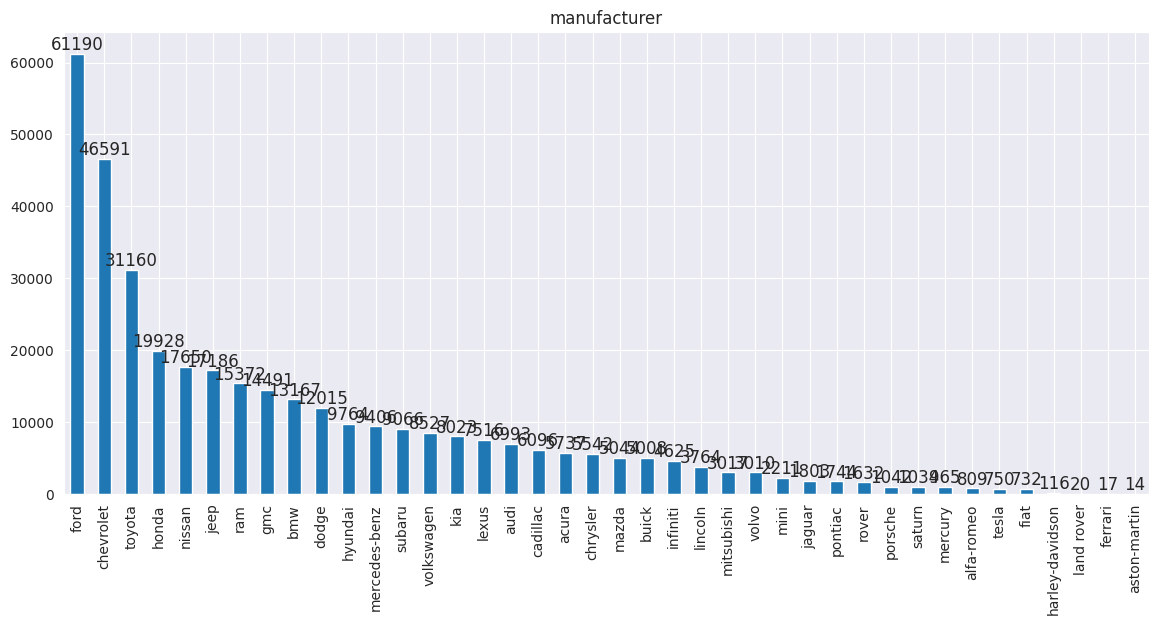

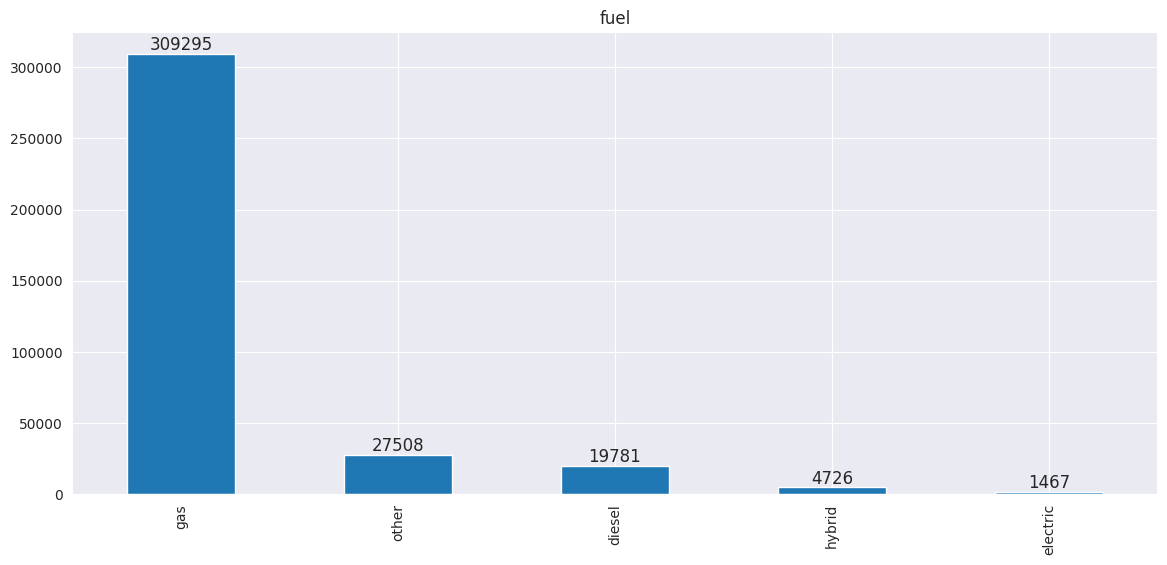

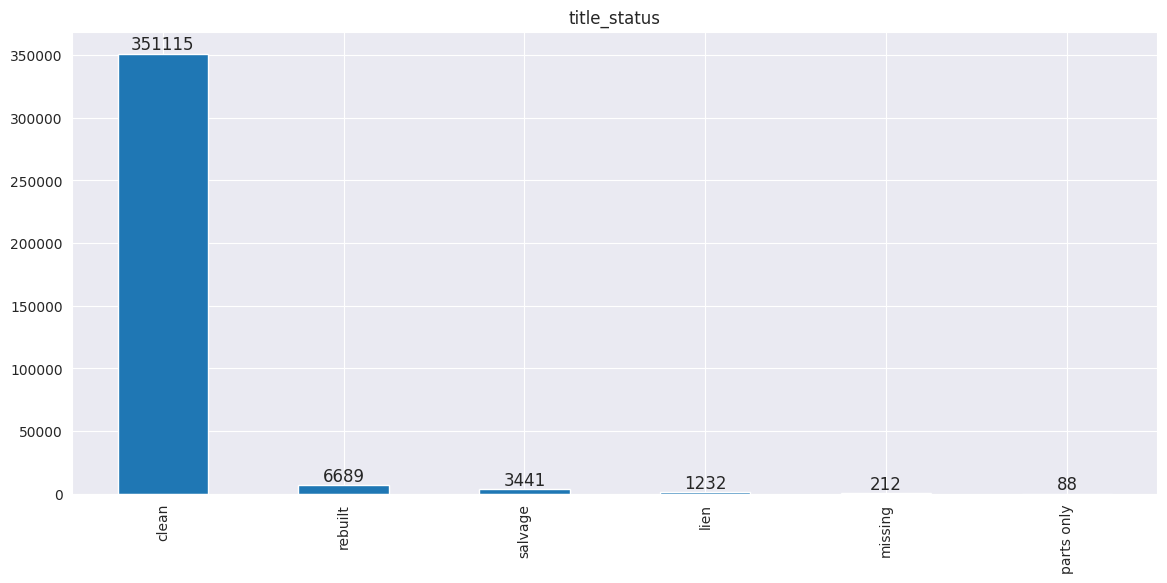

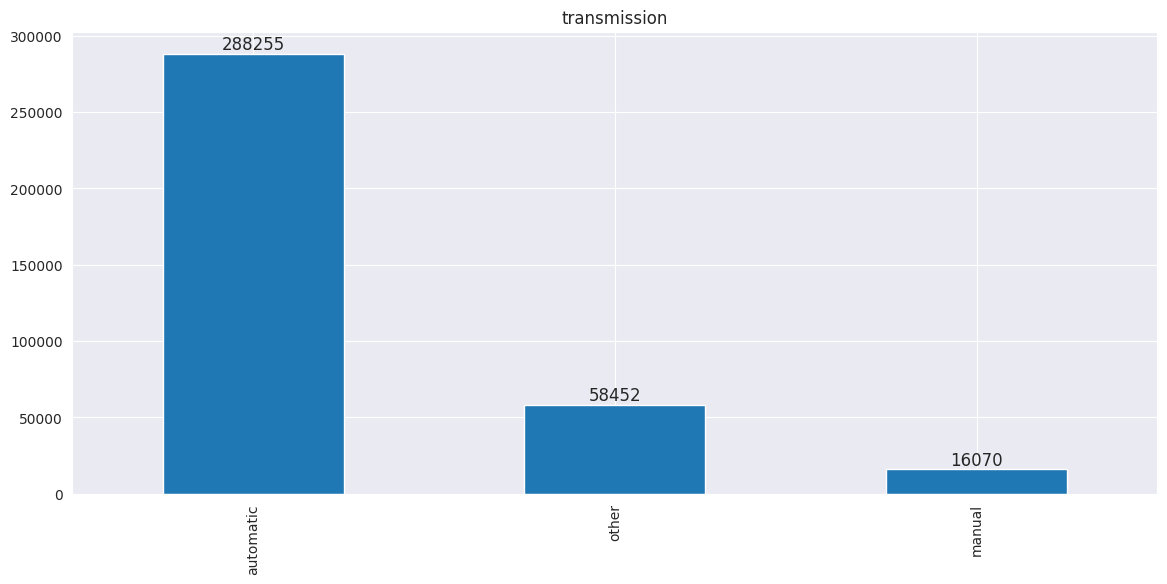

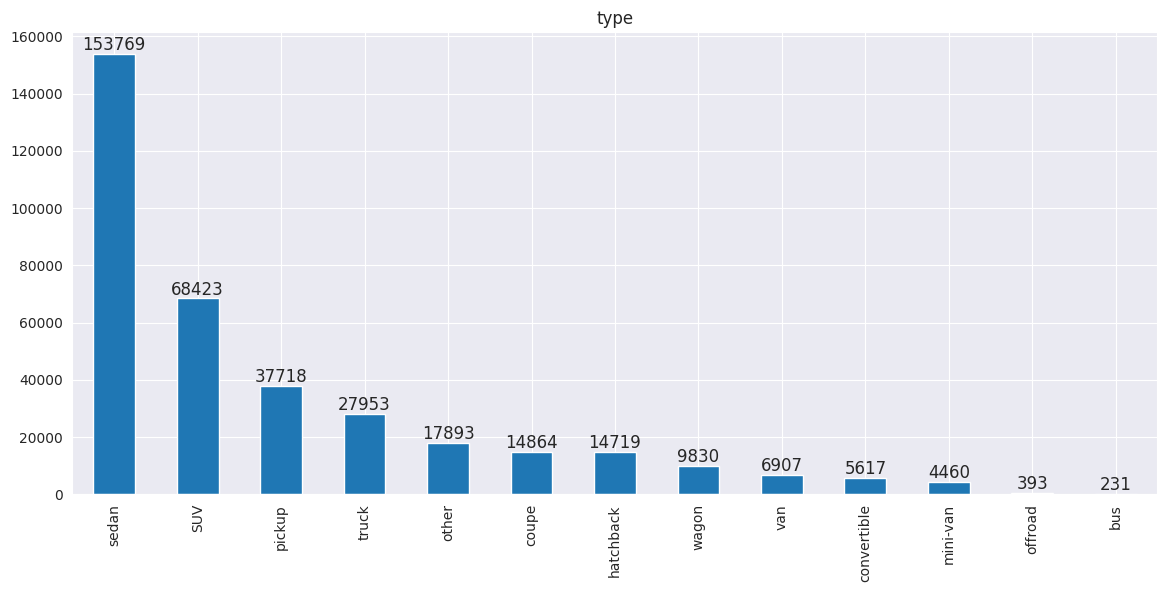

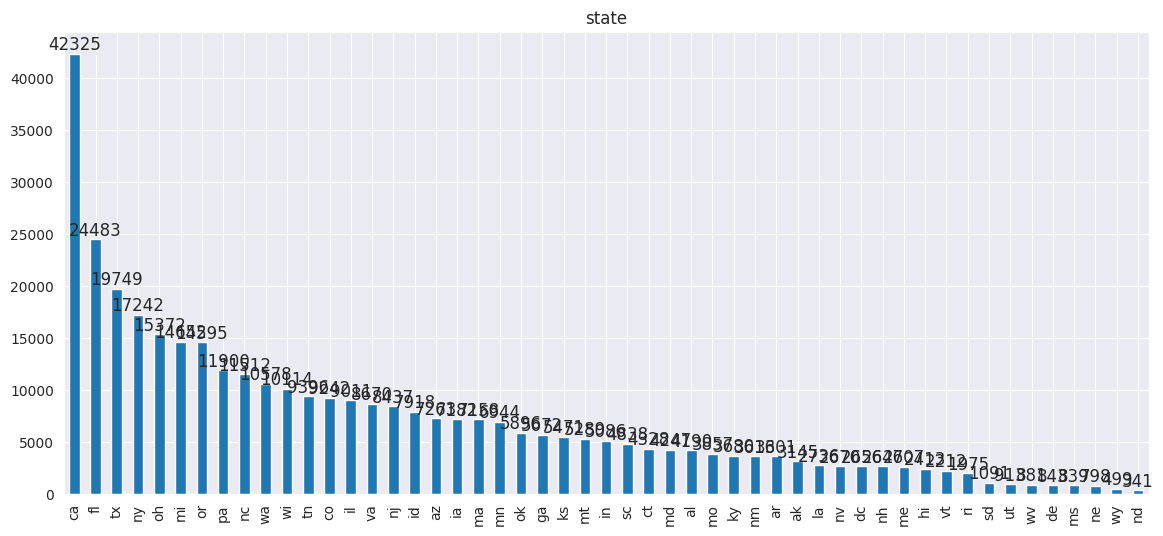

In [64]:
# Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad
for column in few_cardinal_variables:
    minmax_df[column].value_counts().plot(kind='bar', figsize=(14,6))
    # Agrega el total de cada columna en el grafico
    for index, value in enumerate(minmax_df[column].value_counts()):
        plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)
    plt.title(column)
    plt.show()



8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`.


In [65]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Inicializar el codificador one-hot
encoder = OneHotEncoder(sparse=False)

# Ajustar y transformar las columnas categóricas
one_hot = encoder.fit_transform(minmax_df[few_cardinal_variables])

# Crear un DataFrame con las columnas one-hot
one_hot_df = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(few_cardinal_variables))



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [66]:
# Concatenar el DataFrame one-hot con el DataFrame original
one_hot_df = pd.concat([minmax_df, one_hot_df], axis=1)

# Mostrar el resultado
print(one_hot_df)

        region                     region_url    price manufacturer  \
27      auburn  https://auburn.craigslist.org 0.788279          gmc   
28      auburn  https://auburn.craigslist.org 0.663623    chevrolet   
29      auburn  https://auburn.craigslist.org 0.846457    chevrolet   
30      auburn  https://auburn.craigslist.org 0.761222       toyota   
31      auburn  https://auburn.craigslist.org 0.555366         ford   
...        ...                            ...      ...          ...   
362743     NaN                            NaN      NaN          NaN   
362744     NaN                            NaN      NaN          NaN   
362756     NaN                            NaN      NaN          NaN   
362759     NaN                            NaN      NaN          NaN   
362766     NaN                            NaN      NaN          NaN   

                           model fuel  odometer title_status transmission  \
27      sierra 1500 crew cab slt  gas  0.434239        clean        ot

In [67]:
# Eliminar variables categoricas del dataframe original
one_hot_df = one_hot_df.drop(columns=few_cardinal_variables)
one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416274 entries, 27 to 362766
Columns: 126 entries, region to state_wy
dtypes: float64(123), object(3)
memory usage: 403.3+ MB


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`.

In [72]:
%pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 789.4 kB/s eta 0:00:00


In [69]:
# Just in case to prevent rerunning the entire notebook
trans_df_backup6= one_hot_df.copy()

In [70]:
# Restoring dataframe
#one_hot_df = trans_df_backup6
one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416274 entries, 27 to 362766
Columns: 126 entries, region to state_wy
dtypes: float64(123), object(3)
memory usage: 403.3+ MB


In [74]:
# Codificacion binaria a las variables en highly_cardinal_variables
import category_encoders
from category_encoders import BinaryEncoder

binary_encoder = BinaryEncoder()
binary_encoder_df = binary_encoder.fit_transform(one_hot_df[highly_cardinal_variables])
# Returns directly a dataframe with the names in the columns
binary_encoder_df

# Muestra el dataframe con las variables codificadas
binary_encoder_df.head()

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [75]:
# concatena el dataframe bindary con las variables codificadas
binary_encoder_df = pd.concat([one_hot_df, binary_encoder_df], axis=1)

# Eliminar variables categoricas del dataframe original
binary_encoder_df = binary_encoder_df.drop(columns=highly_cardinal_variables)
binary_encoder_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 416274 entries, 27 to 362766
Columns: 156 entries, price to model_14
dtypes: float64(123), int64(33)
memory usage: 498.6 MB


In [76]:
# devuelv una lista de todas las columnas del dataframe minmax_df sin contraer la salida
binary_encoder_df.columns.tolist()

['price',
 'odometer',
 'lat',
 'long',
 'age',
 'manufacturer_acura',
 'manufacturer_alfa-romeo',
 'manufacturer_aston-martin',
 'manufacturer_audi',
 'manufacturer_bmw',
 'manufacturer_buick',
 'manufacturer_cadillac',
 'manufacturer_chevrolet',
 'manufacturer_chrysler',
 'manufacturer_dodge',
 'manufacturer_ferrari',
 'manufacturer_fiat',
 'manufacturer_ford',
 'manufacturer_gmc',
 'manufacturer_harley-davidson',
 'manufacturer_honda',
 'manufacturer_hyundai',
 'manufacturer_infiniti',
 'manufacturer_jaguar',
 'manufacturer_jeep',
 'manufacturer_kia',
 'manufacturer_land rover',
 'manufacturer_lexus',
 'manufacturer_lincoln',
 'manufacturer_mazda',
 'manufacturer_mercedes-benz',
 'manufacturer_mercury',
 'manufacturer_mini',
 'manufacturer_mitsubishi',
 'manufacturer_nissan',
 'manufacturer_pontiac',
 'manufacturer_porsche',
 'manufacturer_ram',
 'manufacturer_rover',
 'manufacturer_saturn',
 'manufacturer_subaru',
 'manufacturer_tesla',
 'manufacturer_toyota',
 'manufacturer_volksw

10. Concatena los dataframes obtenidos de las codificaciones anteriores al dataframe `minmax_df` (cuyas variables numéricas ya están transformadas) y elimina las columnas categóricas originales. Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [77]:
# Devuelve una lista de las variables del dataframe minmax_df
minmax_df.columns.tolist()

['region',
 'region_url',
 'price',
 'manufacturer',
 'model',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'type',
 'state',
 'lat',
 'long',
 'age']

In [78]:
# concatena el dataframe bindary con las variables codificadas
minmax_df= pd.concat([minmax_df, binary_encoder_df], axis=1)

# Eliminar variables categoricas del dataframe original
minmax_df = minmax_df.drop(columns=minmax_df.describe(include=['object']).columns)
minmax_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416274 entries, 27 to 362766
Columns: 161 entries, price to model_14
dtypes: float64(128), int64(33)
memory usage: 514.5 MB


In [79]:
minmax_df.columns.tolist()

['price',
 'odometer',
 'lat',
 'long',
 'age',
 'price',
 'odometer',
 'lat',
 'long',
 'age',
 'manufacturer_acura',
 'manufacturer_alfa-romeo',
 'manufacturer_aston-martin',
 'manufacturer_audi',
 'manufacturer_bmw',
 'manufacturer_buick',
 'manufacturer_cadillac',
 'manufacturer_chevrolet',
 'manufacturer_chrysler',
 'manufacturer_dodge',
 'manufacturer_ferrari',
 'manufacturer_fiat',
 'manufacturer_ford',
 'manufacturer_gmc',
 'manufacturer_harley-davidson',
 'manufacturer_honda',
 'manufacturer_hyundai',
 'manufacturer_infiniti',
 'manufacturer_jaguar',
 'manufacturer_jeep',
 'manufacturer_kia',
 'manufacturer_land rover',
 'manufacturer_lexus',
 'manufacturer_lincoln',
 'manufacturer_mazda',
 'manufacturer_mercedes-benz',
 'manufacturer_mercury',
 'manufacturer_mini',
 'manufacturer_mitsubishi',
 'manufacturer_nissan',
 'manufacturer_pontiac',
 'manufacturer_porsche',
 'manufacturer_ram',
 'manufacturer_rover',
 'manufacturer_saturn',
 'manufacturer_subaru',
 'manufacturer_tesla

In [80]:
minmax_df.reset_index(drop=True, inplace=True)
print(minmax_df)

          price  odometer       lat       long      age    price  odometer  \
0      0.788279  0.434239 32.590000 -85.480000 0.573885 0.788279  0.434239   
1      0.663623  0.484697 32.590000 -85.480000 0.704320 0.663623  0.484697   
2      0.846457  0.240991 32.590000 -85.480000 0.237377 0.846457  0.240991   
3      0.761222  0.361921 32.590000 -85.480000 0.439710 0.761222  0.361921   
4      0.555366  0.661793 32.592000 -85.518900 0.610447 0.555366  0.661793   
...         ...       ...       ...        ...      ...      ...       ...   
416269      NaN       NaN       NaN        NaN      NaN      NaN       NaN   
416270      NaN       NaN       NaN        NaN      NaN      NaN       NaN   
416271      NaN       NaN       NaN        NaN      NaN      NaN       NaN   
416272      NaN       NaN       NaN        NaN      NaN      NaN       NaN   
416273      NaN       NaN       NaN        NaN      NaN      NaN       NaN   

             lat       long      age  ...  model_5  model_6  mo